In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
!pip install fuzzy-logic-toolbox

# Identifying parameters for Ranking

In [ ]:
df1 = pd.read_csv('/content/gdrive/MyDrive/conditions-contributing-to-death-covid19/owid-covid-data.csv')
df2 = pd.read_csv('/content/gdrive/MyDrive/conditions-contributing-to-death-covid19/Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv')
df3 = pd.read_csv('/content/gdrive/MyDrive/conditions-contributing-to-death-covid19/Deaths_involving_coronavirus_disease_2019__COVID-19__by_race_and_Hispanic_origin_group_and_age__by_state.csv')
df4 = pd.read_csv('/content/gdrive/MyDrive/conditions-contributing-to-death-covid19/Conditions_contributing_to_deaths_involving_coronavirus_disease_2019__COVID-19___by_age_group_and_state__United_States.csv')

In [ ]:
df1.head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
df2.head(2)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,04/07/2021,01/01/2020,04/03/2021,By Total,NaN,NaN,United States,All Sexes,All Ages,539723.0,4161167.0,466437.0,263147.0,9037.0,750804.0,NaN
1,04/07/2021,01/01/2020,04/03/2021,By Total,NaN,NaN,United States,All Sexes,Under 1 year,59.0,22626.0,246.0,10.0,21.0,316.0,NaN


In [ ]:
options = ['0-17 years', '18-29 years', '30-39 years', '40-49 years', '50-64 years', '65-74 years', '75-84 years', '85 years and over']
df2 = df2.iloc[(df2['State']!='United States').values]
df2 = df2[df2['Age Group'].isin(options)]

In [ ]:
fig = go.Figure(data=[go.Pie(labels=df2['Age Group'], 
                             values=df2['Total Deaths'])])
fig.update_layout(legend=dict(xanchor="right", x = 1))
fig.show()

Deaths due to pneumonia and / or Covid-19 mainly occur in patients over 50 years of age, most serious is for patients over 85 years old.

In [ ]:
x0 = 'Age Group'
x1 = 'Total Deaths'
x2 = 'COVID-19 Deaths'
x3 = 'Pneumonia Deaths'
x4 = 'Pneumonia and COVID-19 Deaths'
x5 = 'Influenza Deaths'
x6 = 'Pneumonia, Influenza, or COVID-19 Deaths'
temp = df2.groupby(by=x0).sum().reset_index()
fig = go.Figure(data=[
    go.Bar(name=x2, x=temp[x0], y=temp[x2]),
    go.Bar(name=x3, x=temp[x0], y=temp[x3]),
    go.Bar(name=x4, x=temp[x0], y=temp[x4]),
    go.Bar(name=x5, x=temp[x0], y=temp[x5]),
    go.Bar(name=x6, x=temp[x0], y=temp[x6])])
fig.update_layout(barmode='group')
fig.update_layout(legend=dict(yanchor="top", y=1.02, xanchor="left", x=1))
fig.show()

### 3. Comorbidities and Covid-19
What are comorbidities?

The CDC reports that comorbidity is more than one disease or condition that is present in the same person at the same time. These conditions are often chronic or long-term diseases, which are also called comorbid conditions, multimorbidity, multiple chronic conditions, or coexisting conditions.

Some individuals may be at an increased risk from COVID-19 infection if they have asthma, cerebrovascular disease, cystic fibrosis, high blood pressure, HIV, immune deficiencies, dementia, liver disease, smoking, pregnancy, pulmonary fibrosis, thalassemia, and type 1 diabetes.

In [ ]:
df4 = df4.iloc[(df4['State']!='US').values]
df4.head(2)

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
230,02/07/2021,01/04/2020,02/06/2021,AL,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN,One or more data cells have counts between 1-9...
231,02/07/2021,01/04/2020,02/06/2021,AL,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,22.0,23.0,NaN


In [ ]:
fig = go.Figure(data=[go.Pie(labels=df4['Condition Group'], values=df4['COVID-19 Deaths'])])
fig.update_layout(legend=dict(xanchor="right",x=2.5))
fig.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=df4['Condition'], values=df4['COVID-19 Deaths'], hole=.3)])
fig.update_layout(legend=dict(xanchor="left",x=1))
fig.show()

In [ ]:
fig = px.scatter(df4.groupby(by=['Condition Group','Condition', 'Age Group']).sum().reset_index(), 
           x='Condition Group', y='Age Group', color='COVID-19 Deaths', size='COVID-19 Deaths')
fig.update_yaxes(automargin=True)

The top underlying health conditions include influenza and pneumonia, respiratory failure, hypertensive disease, diabetes, cardiac arrest, vascular and unspecified dementia, renal failure, heart failure and other medical conditions.

### Conclusions
***Criteria for ranking:***

Aged over 65+

Individuals with any underlying medical condition: Pneumonia, Influenza

People have underlying diseases: Respiratory, Circulatory, Diabeties, Hypertensive, Cardiac arrest, Ischemic heart disease.

In [ ]:
df_all = pd.read_csv('owid-covid-data.csv')

In [ ]:
df_country = pd.read_csv('df_country_2.csv')

#Data Preprocessing

In [ ]:
## Removing Continents and World from df
l1=['Africa','Asia','Europe','World','North America','South America']
df_new = df_all[~df_all['location'].isin(l1)]

## Removing all columns with NULL values
df_new.dropna(axis = 1, how = 'all', inplace = True)

df_new.new_cases.fillna(0, inplace=True)
df_new.new_deaths.fillna(0, inplace = True)

In [ ]:
df_country = pd.DataFrame(columns=["location", "total_cases", "total_deaths", "aged_65_older",
"cardiovasc_death_rate", "diabetes_prevalence", "influenza_pneumonia", "hypertension", "respiratory_asthma"])

In [ ]:
df_country['location'] = df_new['location'].unique()
li_cols = list(df_country['location'])
for i in li_cols:
    temp = df_new[df_new['location'] == i]['population'].max()
    df_country.loc[df_country['location'] == i, 'total_cases'] = (df_new[df_new['location'] == i]['new_cases'].sum() / temp)*100
    df_country.loc[df_country['location'] == i, 'total_deaths'] = (df_new[df_new['location'] == i]['new_deaths'].sum() / temp)*100
    df_country.loc[df_country['location'] == i, 'aged_65_older'] = df_new[df_new['location'] == i]['aged_65_older'].mean()
    df_country.loc[df_country['location'] == i, 'cardiovasc_death_rate'] = (df_new[df_new['location'] == i]['cardiovasc_death_rate'].mean() / temp)*10000
    df_country.loc[df_country['location'] == i, 'diabetes_prevalence'] = df_new[df_new['location'] == i]['diabetes_prevalence'].mean()
    df_country.loc[df_country['location'] == i, 'influenza_pneumonia'] = np.random.uniform(1.5, 25.5)
    df_country.loc[df_country['location'] == i, 'hypertension'] = np.random.uniform(0.5, 1) * (df_new[df_new['location'] == i]['cardiovasc_death_rate'].mean() / temp)*10000
    df_country.loc[df_country['location'] == i, 'respiratory_asthma'] = np.random.uniform(2.5, 20.5)

df_country.drop([df_country.index[120]], inplace = True)

In [ ]:
df_country.to_csv('df_country_2.csv')

#Histograms

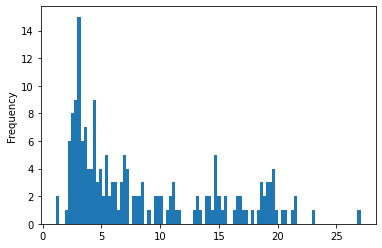

In [ ]:
df_country['aged_65_older'].plot.hist(bins = 100)

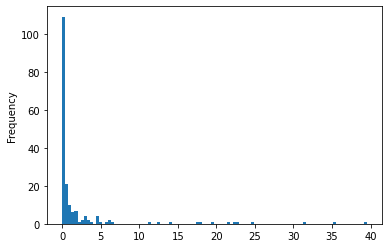

In [ ]:
df_country['cardiovasc_death_rate'].plot.hist(bins = 100)

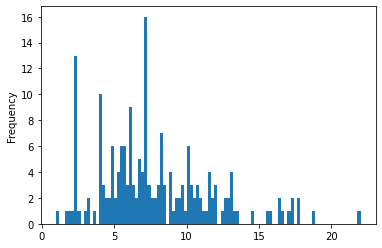

In [ ]:
df_country['diabetes_prevalence'].plot.hist(bins = 100)

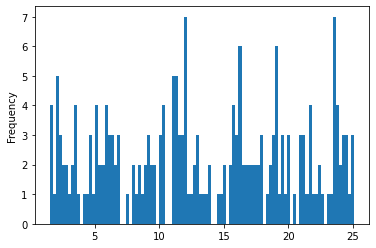

In [ ]:
df_country['influenza_pneumonia'].plot.hist(bins = 100)

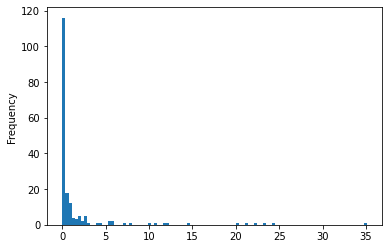

In [ ]:
df_country['hypertension'].plot.hist(bins = 100)

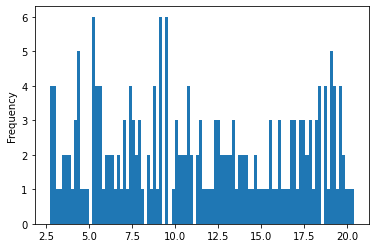

In [ ]:
df_country['respiratory_asthma'].plot.hist(bins = 100)

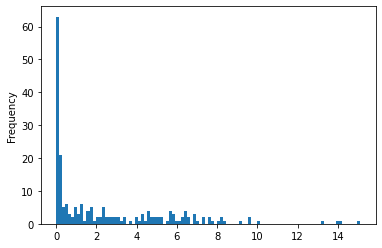

In [ ]:
df_country['total_cases'].plot.hist(bins = 100)

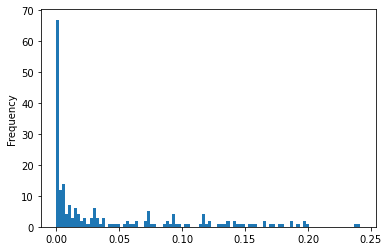

In [ ]:
df_country['total_deaths'].plot.hist(bins = 100)

# Fuzzy logic implementation

## Fuzzy sets creation


In [ ]:
Fuzzy_sets = {'age_65' : ['age_less', 'age_moderate', 'age_high'],
              'cardiovasc_death_rate' : ['cardio_less', 'cardio_moderate', 'cardio_high'],
              'diabetes_p' : ['diab_less', 'diab_moderate', 'diab_high'],
              'hypertension' : ['hyp_less', 'hyp_moderate', 'hyp_high'],
              'influenza' : ['infl_less', 'infl_moderate', 'infl_high'],
              'asthama' : ['astma_less', 'astma_moderate', 'astma_high'],
              'total_cases' : ['cases_less', 'cases_moderate', 'cases_high'],
              'total_deaths': ['deaths_less', 'deaths_moderate', 'deaths_high']
              }
inputVar1 = 'age_65'
inputVar2 = 'cardiovasc_death_rate'
inputVar3 = 'diabetes_p'
inputVar4 = 'hypertension'
inputVar5 = 'influenza'
inputVar6 = 'asthama'
inputVar7 = 'total_cases'
inputVar8 = 'total_deaths'
inputClasses = [
                ['age_less', 'age_moderate', 'age_high'], 
                ['cardio_less', 'cardio_moderate', 'cardio_high'], 
                ['diab_less', 'diab_moderate', 'diab_high'], 
                ['hyp_less', 'hyp_moderate', 'hyp_high'], 
                ['infl_less', 'infl_moderate', 'infl_high'], 
                ['astma_less', 'astma_moderate', 'astma_high'], 
                ['cases_less', 'cases_moderate', 'cases_high'],
                ['deaths_less', 'deaths_moderate', 'deaths_high']
                ]
outputClasses = ['minor', 'mild', 'major']


##Triangular plots of selected ranges

In [ ]:
df_country = pd.read_csv('df_country_2.csv')

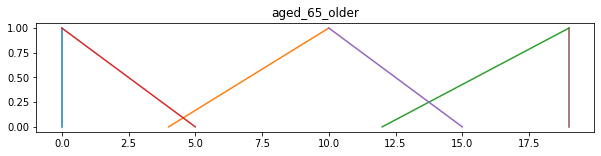

In [ ]:
x = [0, 0, 5]; x1 = [4, 10, 15]; x2 = [12, 19, 19]
y = [0, 1, 0]; y1 = [0, 1, 0]; y2 = [0, 1, 0]
plt.figure(figsize=(10, 2))
for i in range(len(x)):
    plt.plot(x[i:i+2], y[i:i+2])
    plt.plot(x1[i:i+2], y1[i:i+2])
    plt.plot(x2[i:i+2], y2[i:i+2])
plt.title('aged_65_older')
plt.show()

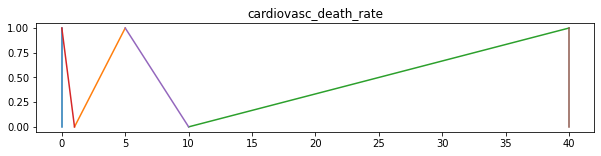

In [ ]:
x = [0, 0, 1]; x1 = [1, 5, 10]; x2 = [10, 40, 40]
y = [0, 1, 0]; y1 = [0, 1, 0]; y2 = [0, 1, 0]
plt.figure(figsize=(10, 2))
for i in range(len(x)):
    plt.plot(x[i:i+2], y[i:i+2])
    plt.plot(x1[i:i+2], y1[i:i+2])
    plt.plot(x2[i:i+2], y2[i:i+2])
plt.title('cardiovasc_death_rate')
plt.show()

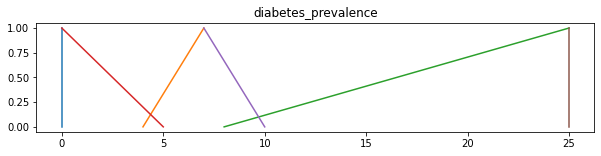

In [ ]:
x = [0, 0, 5]; x1 = [4, 7, 10]; x2 = [8, 25, 25]
y = [0, 1, 0]; y1 = [0, 1, 0]; y2 = [0, 1, 0]
plt.figure(figsize=(10, 2))
for i in range(len(x)):
    plt.plot(x[i:i+2], y[i:i+2])
    plt.plot(x1[i:i+2], y1[i:i+2])
    plt.plot(x2[i:i+2], y2[i:i+2])
plt.title('diabetes_prevalence')
plt.show()

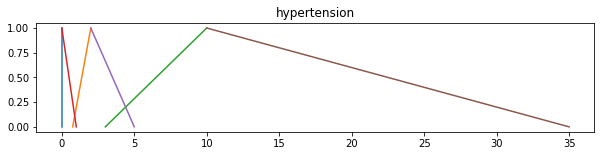

In [ ]:
x = [0, 0, 1]; x1 = [0.75, 2, 5]; x2 = [3, 10, 35]
y = [0, 1, 0]; y1 = [0, 1, 0]; y2 = [0, 1, 0]
plt.figure(figsize=(10, 2))
for i in range(len(x)):
    plt.plot(x[i:i+2], y[i:i+2])
    plt.plot(x1[i:i+2], y1[i:i+2])
    plt.plot(x2[i:i+2], y2[i:i+2])
plt.title('hypertension')
plt.show()

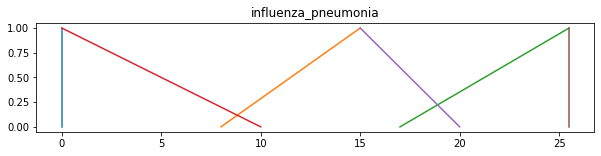

In [ ]:
x = [0, 0, 10]; x1 = [8, 15, 20]; x2 = [17, 25.5, 25.5]
y = [0, 1, 0]; y1 = [0, 1, 0]; y2 = [0, 1, 0]
plt.figure(figsize=(10, 2))
for i in range(len(x)):
    plt.plot(x[i:i+2], y[i:i+2])
    plt.plot(x1[i:i+2], y1[i:i+2])
    plt.plot(x2[i:i+2], y2[i:i+2])
plt.title('influenza_pneumonia')
plt.show()

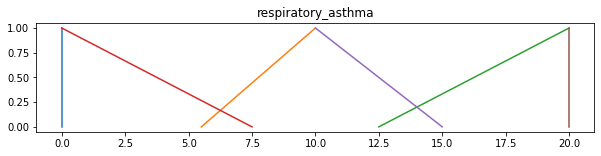

In [ ]:
x = [0, 0, 7.5]; x1 = [5.5, 10, 15]; x2 = [12.5, 20, 20]
y = [0, 1, 0]; y1 = [0, 1, 0]; y2 = [0, 1, 0]
plt.figure(figsize=(10, 2))
for i in range(len(x)):
    plt.plot(x[i:i+2], y[i:i+2])
    plt.plot(x1[i:i+2], y1[i:i+2])
    plt.plot(x2[i:i+2], y2[i:i+2])
plt.title('respiratory_asthma')
plt.show()

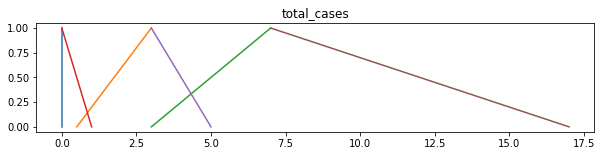

In [ ]:
x = [0, 0, 1]; x1 = [0.5, 3, 5]; x2 = [3, 7, 17]
y = [0, 1, 0]; y1 = [0, 1, 0]; y2 = [0, 1, 0]
plt.figure(figsize=(10, 2))
for i in range(len(x)):
    plt.plot(x[i:i+2], y[i:i+2])
    plt.plot(x1[i:i+2], y1[i:i+2])
    plt.plot(x2[i:i+2], y2[i:i+2])
plt.title('total_cases')
plt.show()

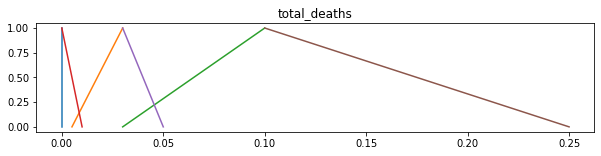

In [ ]:
x = [0, 0, 0.01]; x1 = [0.005, 0.03, 0.05]; x2 = [0.03, 0.10, 0.25]
y = [0, 1, 0]; y1 = [0, 1, 0]; y2 = [0, 1, 0]
plt.figure(figsize=(10, 2))
for i in range(len(x)):
    plt.plot(x[i:i+2], y[i:i+2])
    plt.plot(x1[i:i+2], y1[i:i+2])
    plt.plot(x2[i:i+2], y2[i:i+2])
plt.title('total_deaths')
plt.show()

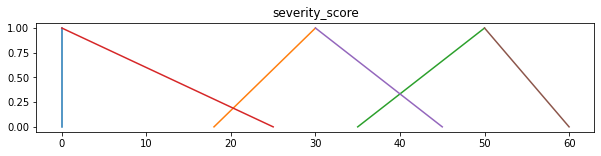

In [ ]:
x = [0, 0, 25]; x1 = [18, 30, 45]; x2 = [35, 50, 60]
y = [0, 1, 0]; y1 = [0, 1, 0]; y2 = [0, 1, 0]
plt.figure(figsize=(10, 2))
for i in range(len(x)):
    plt.plot(x[i:i+2], y[i:i+2])
    plt.plot(x1[i:i+2], y1[i:i+2])
    plt.plot(x2[i:i+2], y2[i:i+2])
plt.title('severity_score')
plt.show()

##Fuzzy Rule base creation

In [ ]:
#function to make strings of rules

def makeRule(ipc1, ipc2, ipc3, ipc4, ipc5, ipc6, ipc7, ipc8, opc):
  rule = 'if (' + inputVar1 + ' is ' + inputClasses[0][ipc1] + ') and (' + inputVar2 +' is '+ inputClasses[1][ipc2] +')'
  rule += ' and (' + inputVar3 + ' is ' + inputClasses[2][ipc3] + ') and (' + inputVar4 +' is '+ inputClasses[3][ipc4] +')'
  rule += ' and (' + inputVar5 + ' is ' + inputClasses[4][ipc5] + ') and (' + inputVar6 +' is '+ inputClasses[5][ipc6] +')'
  rule += ' and (' + inputVar7 + ' is ' + inputClasses[6][ipc7] + ') and (' + inputVar8 +' is '+ inputClasses[7][ipc8] +')'
  rule += ' then (severity is ' + outputClasses[opc] + ')'
  return rule

In [ ]:
#Approach to create fuzzy rules


'''8=7>1>5>6>3>2>4'''

priorityClasses = {2 : [8, 7, 1, 5],
                   1 : [5, 6, 3],
                   0 : [3, 4, 2]}
rules = set()
count = 0
opc = 0
for ipc1 in range(3):
  for ipc2 in range(3):
    for ipc3 in range(3):
      for ipc4 in range(3):
        for ipc5 in range(3):
          for ipc6 in range(3):
            for ipc7 in range(3):
              for ipc8 in range(3):
                count += 1
                s0 = ipc3 + ipc4 + ipc2
                s1 = ipc5 + ipc6 + ipc3
                s2 = ipc8 + ipc7 + ipc1 + ipc5
                total = s0 + s1 + s2 - ipc3 - ipc5
                if (s2 == 4 or s2 == 3) and (ipc8 <= 1 and ipc7 <= 1 and ipc1 <= 1 and ipc5 <= 1):
                  '''s2: 2 major 2 minor/ '''
                  opc = 1 
                  rules.add(makeRule(ipc1, ipc2, ipc3, ipc4, ipc5, ipc6, ipc7, ipc8, opc))
                if total == 0:# all minor
                  opc = 0
                if s2 >= 4:#don't care condition for s2
                  opc = 2
                  rules.add(makeRule(ipc1, ipc2, ipc3, ipc4, ipc5, ipc6, ipc7, ipc8, opc))
                if total > 10:
                  opc = 2
                  '''elif total > 10 and s2 + s1 - ipc5 > 8 and s2 > 4:# most of them major
                  opc = 2'''
                elif s2 >= 4 and s1 + s0 >= 5:# 2 major 2 minor or all mild at least for s2
                  opc = 2
                elif s2 < 4 and s1 >= 4:#s2: 2 major 1 mild 1 minor/3mild; s1: 2 major/1 major 2 mild atleast
                  opc = 2
                  rules.add(makeRule(ipc1, ipc2, ipc3, ipc4, ipc5, ipc6, ipc7, ipc8, opc))
                  opc = 1
                elif s2 <= 1 and s1 <= 4 and s0 >= 5:# higher priority classes have minor values and lower priority has higher values
                  '''s2 3 mild/1 major 1 mild; s1 2 major 1 minor; s0 2 major 1 minor;'''
                  opc = 1
                  rules.add(makeRule(ipc1, ipc2, ipc3, ipc4, ipc5, ipc6, ipc7, ipc8, opc))
                  opc = 0
                elif s2 < 3 and s1 <= 4 and s0 <= 4:
                  '''s2: 1 major/2 mild at most; s1: 2 major at most/1 major 2 minor; s0: 2 major atmost'''
                  opc = 0
                else:
                  opc = 1
                rules.add(makeRule(ipc1, ipc2, ipc3, ipc4, ipc5, ipc6, ipc7, ipc8, opc))
print(count, len(rules))


6561 8239


## Optimized class boundaries and results

In [ ]:
from pprint import pprint
from fuzzy_logic.terms import Term
from fuzzy_logic.variables import FuzzyVariable
from fuzzy_logic.mamdani_fs import MamdaniFuzzySystem
from fuzzy_logic.mf import TriangularMF

#Defining classes for 3 params 
#for age
age_less = Term('age_less', TriangularMF(0, 0, 5))
age_moderate = Term('age_moderate', TriangularMF(4, 10, 15))
age_high = Term('age_high', TriangularMF(12, 19, 30))

#for cardiovasc
cardio_less = Term('cardio_less', TriangularMF(0, 0, 1))
cardio_moderate = Term('cardio_moderate', TriangularMF(1, 5, 10))
cardio_high = Term('cardio_high', TriangularMF(10, 15, 40))

#for diabetes
diab_less = Term('diab_less', TriangularMF(0, 0, 5))
diab_moderate = Term('diab_moderate', TriangularMF(4, 7, 10))
diab_high = Term('diab_high', TriangularMF(8, 12, 25))

#for hypertension
hyp_less = Term('hyp_less', TriangularMF(0, 0, 1))
hyp_moderate = Term('hyp_moderate', TriangularMF(0.75, 2, 5))
hyp_high = Term('hyp_high', TriangularMF(3, 10, 37))

#for influenza
infl_less = Term('infl_less', TriangularMF(0, 0, 10))
infl_moderate = Term('infl_moderate', TriangularMF(8, 15, 20))
infl_high = Term('infl_high', TriangularMF(17, 25, 30))

#for asthama
astma_less = Term('astma_less', TriangularMF(0, 0, 7.5))
astma_moderate = Term('astma_moderate', TriangularMF(5.5, 10, 15))
astma_high = Term('astma_high', TriangularMF(12.5, 20, 25))

#for total_cases
cases_less = Term('cases_less', TriangularMF(0, 0, 1))
cases_moderate = Term('cases_moderate', TriangularMF(0.5, 3, 5))
cases_high = Term('cases_high', TriangularMF(3, 7, 17))

#for total_deaths
deaths_less = Term('deaths_less', TriangularMF(0, 0, 0.01))
deaths_moderate = Term('deaths_moderate', TriangularMF(0.005, 0.03, 0.05))
deaths_high = Term('deaths_high', TriangularMF(0.03, 0.10, 0.25))

#defining fuzzy input vars
age_65: FuzzyVariable = FuzzyVariable('age_65', 0, 30, age_less, age_moderate, age_high)
cardiovasc_death_rate: FuzzyVariable = FuzzyVariable('cardiovasc_death_rate', 0, 40, cardio_less, cardio_moderate, cardio_high)
diabetes_p: FuzzyVariable = FuzzyVariable('diabetes_p', 0, 25, diab_less, diab_moderate, diab_high)
hypertension: FuzzyVariable = FuzzyVariable('hypertension', 0, 40, hyp_less, hyp_moderate, hyp_high)
influenza: FuzzyVariable = FuzzyVariable('influenza', 0, 30, infl_less, infl_moderate, infl_high)
asthama: FuzzyVariable = FuzzyVariable('asthama', 0, 25, astma_less, astma_moderate, astma_high)
total_cases: FuzzyVariable = FuzzyVariable('total_cases', 0, 15, cases_less, cases_moderate, cases_high)
total_deaths: FuzzyVariable = FuzzyVariable('total_deaths', 0, 1, deaths_less, deaths_moderate, deaths_high)

#defining fuzzy output var
severity = FuzzyVariable(
    'severity', 0, 60,
    Term('minor', TriangularMF(0, 0, 25)),
    Term('mild', TriangularMF(18, 30, 43)),
    Term('major', TriangularMF(35, 50, 60))
)

mf: MamdaniFuzzySystem = MamdaniFuzzySystem([age_65, cardiovasc_death_rate, 
                                             diabetes_p, hypertension, influenza, 
                                             asthama, total_cases, total_deaths], 
                                            [severity])


In [ ]:
#drop Nan values and parse the rules
df_country = df_country.dropna()
for i in rules:
  mf.rules.append(mf.parse_rule(i))

In [ ]:
# 37m 52s mins
severity_Scores = df_country.apply(lambda row: mf.calculate({age_65: row['aged_65_older'],
                                                    cardiovasc_death_rate: row['cardiovasc_death_rate'],
                                                    diabetes_p: row['diabetes_prevalence'],
                                                    hypertension: row['hypertension'],
                                                    influenza: row['influenza_pneumonia'],
                                                    asthama: row['respiratory_asthma'],
                                                    total_cases: row['total_cases'],
                                                    total_deaths: row['total_deaths']
                                                    }), axis = 1)


In [ ]:
df_country['severity_score'] = severity_Scores
df_country['severity_score'] = df_country.apply(lambda row: list(row['severity_score'].values())[0],axis = 1)
print("severity adjustmnt results")
sorted_df = df_country.sort_values(by='severity_score', axis = 0, ascending = False)
sorted_df

severity adjustmnt results


,Unnamed: 0,location,total_cases,total_deaths,aged_65_older,cardiovasc_death_rate,diabetes_prevalence,influenza_pneumonia,hypertension,respiratory_asthma,severity_score
177,178,Spain,6.946322,0.159171,19.436,0.021260,7.17,21.668940,0.014006,8.824968,48.127785
151,152,Poland,5.693565,0.134385,16.763,0.060066,5.91,11.499107,0.039647,16.435499,48.052748
102,102,Kuwait,5.255326,0.029457,2.345,0.309643,15.84,15.176097,0.200270,12.525261,48.048390
122,123,Mexico,1.717595,0.155283,6.857,0.011850,13.06,14.775284,0.008287,19.559222,48.032141
191,192,Tunisia,2.098697,0.073300,8.001,0.269905,8.52,11.100220,0.235814,17.483041,47.996673
...,...,...,...,...,...,...,...,...,...,...,...
100,100,Kenya,0.234642,0.003891,2.686,0.040661,2.92,2.625418,0.030000,17.429964,9.975032
28,28,Burkina Faso,0.060369,0.000694,2.409,0.128711,2.42,16.082266,0.085864,15.796754,9.857682
173,174,Somalia,0.067098,0.002964,2.731,0.230142,6.05,2.352323,0.188076,12.379893,9.788650
29,29,Burundi,0.022345,0.000050,2.562,0.246467,6.05,4.624209,0.148524,19.206281,9.625969


In [ ]:
sorted_df['severity_score'].unique()
print(len(sorted_df['severity_score']),len(sorted_df['severity_score'].unique()))

179 177


In [ ]:
import pandas as pd
sorted_df = pd.read_csv("severity_class_adjusted.csv")
sorted_df['rank'] = list(sorted_df.index)

In [ ]:
sorted_df['rank'] = sorted_df.apply(lambda row: row['rank'] + 1, axis = 1)

In [ ]:
sorted_df.to_csv("severity_class_adjusted.csv")

In [ ]:
px.choropleth(sorted_df.groupby(by='location').sum().reset_index(), locations="location", locationmode='country names', 
              color='severity_score',hover_name="location", title='severity ranking on Covid-19', hover_data=['severity_score'], 
              color_continuous_scale='matter')

# Validating Results

# New Section

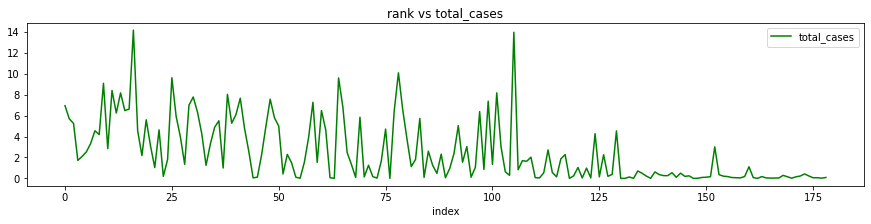

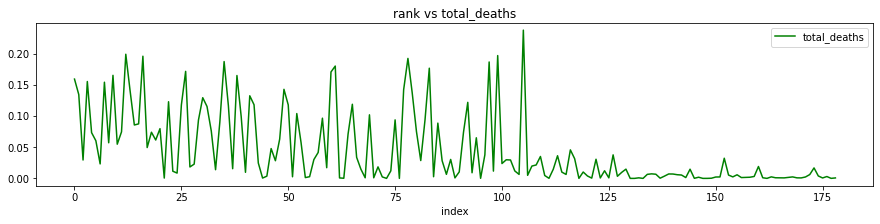

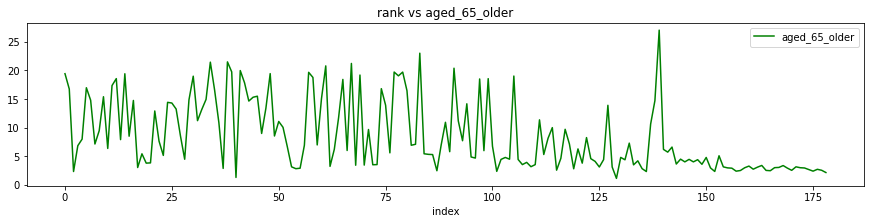

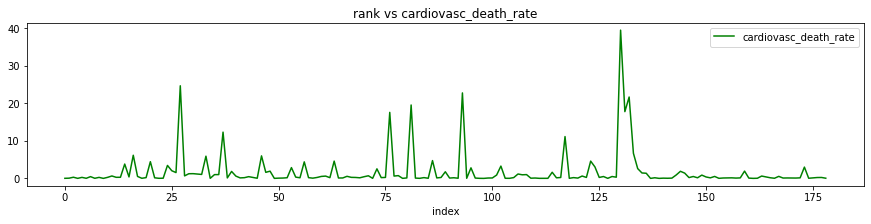

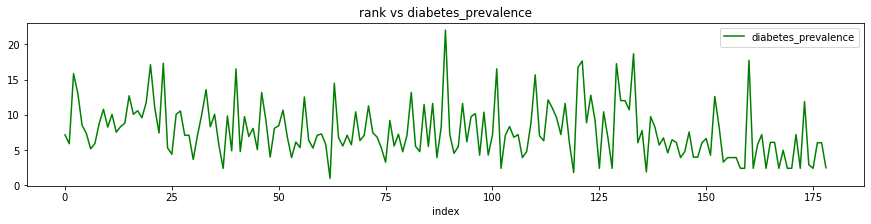

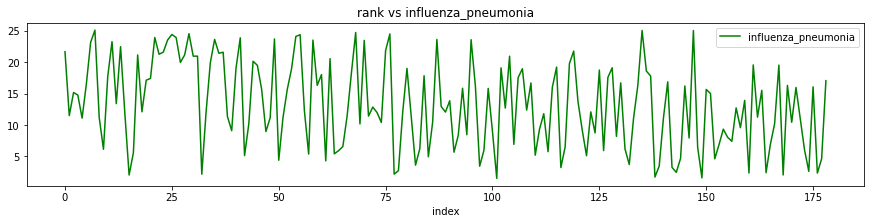

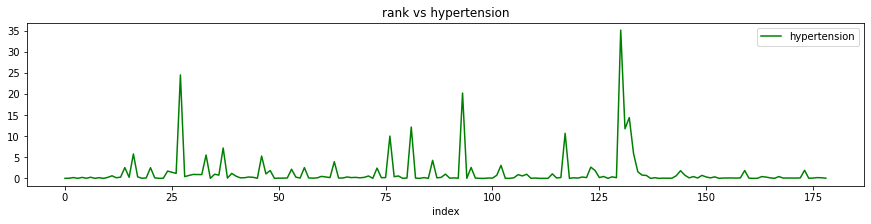

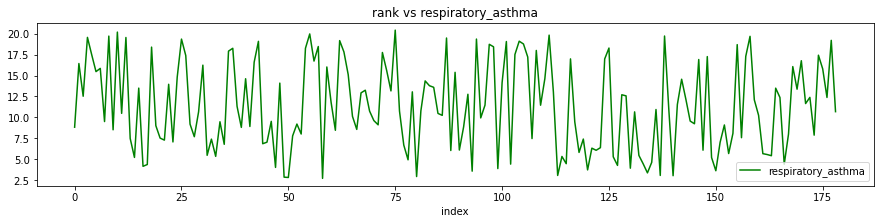

In [ ]:
sorted_df.reset_index().plot(x='index', y='total_cases', color = 'g', title = 'rank vs total_cases', figsize = (15, 3))
sorted_df.reset_index().plot(x='index', y='total_deaths', color = 'g', title = 'rank vs total_deaths', figsize = (15, 3))
sorted_df.reset_index().plot(x='index', y='aged_65_older', color = 'g', title = 'rank vs aged_65_older', figsize = (15, 3))
sorted_df.reset_index().plot(x='index', y='cardiovasc_death_rate', color = 'g', title = 'rank vs cardiovasc_death_rate', figsize = (15, 3))
sorted_df.reset_index().plot(x='index', y='diabetes_prevalence', color = 'g', title = 'rank vs diabetes_prevalence', figsize = (15, 3))
sorted_df.reset_index().plot(x='index', y='influenza_pneumonia', color = 'g', title = 'rank vs influenza_pneumonia', figsize = (15, 3))
sorted_df.reset_index().plot(x='index', y='hypertension', color = 'g', title = 'rank vs hypertension', figsize = (15, 3))
sorted_df.reset_index().plot(x='index', y='respiratory_asthma', color = 'g', title = 'rank vs respiratory_asthma', figsize = (15, 3))